# ML Website (Software Developer Sallary Prediction)
## 1st Page
Input:
- Country
- Education level
- Years of Experience

## 2nd Page
Explore Software Engineer Salaries
- Pie Chart
- Bar Graph, etc

Create env and activate it

`pip install streamlit`

using survey_results_public.csv


In [166]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [167]:
df = pd.read_csv('dataset/survey_results_public.csv')

In [168]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [169]:
col_list=["Country", "EdLevel", "YearsCodePro", "Employment", "RemoteWork", 
          "YearsCode", "Age", "WorkExp", "MainBranch", "DevType", "ConvertedCompYearly"]

In [170]:
df = df[col_list]
df = df.rename({"ConvertedCompYearly": "YearlySalary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,RemoteWork,YearsCode,Age,WorkExp,MainBranch,DevType,YearlySalary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",Fully remote,NaN,NaN,NaN,I am a developer by profession,NaN,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time","Hybrid (some remote, some in-person)",14,25-34 years old,NaN,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",Fully remote,20,35-44 years old,NaN,I am a developer by profession,"Developer, full-stack",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time","Hybrid (some remote, some in-person)",8,25-34 years old,NaN,I am a developer by profession,"Developer, front-end;Developer, full-stack;Dev...",NaN


In [171]:
df = df[df['YearlySalary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,RemoteWork,YearsCode,Age,WorkExp,MainBranch,DevType,YearlySalary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time","Hybrid (some remote, some in-person)",14,25-34 years old,NaN,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",Fully remote,20,35-44 years old,NaN,I am a developer by profession,"Developer, full-stack",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time","Hybrid (some remote, some in-person)",6,25-34 years old,6.0,I am a developer by profession,"Developer, back-end",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time","Hybrid (some remote, some in-person)",5,18-24 years old,NaN,I am a developer by profession,"Developer, full-stack;Developer, back-end",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",Fully remote,12,35-44 years old,14.0,"I am not primarily a developer, but I write co...",Engineering manager,194400.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   RemoteWork    38015 non-null  object 
 5   YearsCode     38001 non-null  object 
 6   Age           37984 non-null  object 
 7   WorkExp       27103 non-null  float64
 8   MainBranch    38071 non-null  object 
 9   DevType       37989 non-null  object 
 10  YearlySalary  38071 non-null  float64
dtypes: float64(2), object(9)
memory usage: 3.5+ MB


In [173]:
display(df.isnull().sum())
df["WorkExp"].fillna(0, inplace=True)
df = df.dropna()
display(df.isnull().sum())
# df.reindex()

Country             0
EdLevel            17
YearsCodePro      136
Employment          4
RemoteWork         56
YearsCode          70
Age                87
WorkExp         10968
MainBranch          0
DevType            82
YearlySalary        0
dtype: int64

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
RemoteWork      0
YearsCode       0
Age             0
WorkExp         0
MainBranch      0
DevType         0
YearlySalary    0
dtype: int64

In [174]:
df = df[df["Employment"]=="Employed, full-time"]
df = df.drop("Employment", axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31251 entries, 2 to 73121
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31251 non-null  object 
 1   EdLevel       31251 non-null  object 
 2   YearsCodePro  31251 non-null  object 
 3   RemoteWork    31251 non-null  object 
 4   YearsCode     31251 non-null  object 
 5   Age           31251 non-null  object 
 6   WorkExp       31251 non-null  float64
 7   MainBranch    31251 non-null  object 
 8   DevType       31251 non-null  object 
 9   YearlySalary  31251 non-null  float64
dtypes: float64(2), object(8)
memory usage: 2.6+ MB


In [175]:
df['Country'].value_counts()

United States of America                                7818
Germany                                                 2378
United Kingdom of Great Britain and Northern Ireland    2329
India                                                   1859
Canada                                                  1244
                                                        ... 
Palau                                                      1
Yemen                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 154, dtype: int64

In [176]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'others'
            
        if categorical_map[categories.index[i]] == 'United Kingdom of Great Britain and Northern Ireland':
            categorical_map[categories.index[i]] = 'United Kingdom'
        if categorical_map[categories.index[i]] == "Other (please specify):":
            categorical_map[categories.index[i]] = "others"
    
    return categorical_map

In [177]:
country_map = shorten_categories(df.Country.value_counts(), 350)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

others                      8250
United States of America    7818
Germany                     2378
United Kingdom              2329
India                       1859
Canada                      1244
France                      1122
Brazil                      1010
Spain                        855
Netherlands                  700
Australia                    697
Italy                        664
Poland                       572
Sweden                       556
Russian Federation           423
Switzerland                  415
Turkey                       359
Name: Country, dtype: int64

In [178]:
df = df[df["Age"]!='Prefer not to say']

In [179]:
df

,Country,EdLevel,YearsCodePro,RemoteWork,YearsCode,Age,WorkExp,MainBranch,DevType,YearlySalary
2,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Hybrid (some remote, some in-person)",14,25-34 years old,0.0,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,40205.0
3,others,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,Fully remote,20,35-44 years old,0.0,I am a developer by profession,"Developer, full-stack",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Hybrid (some remote, some in-person)",6,25-34 years old,6.0,I am a developer by profession,"Developer, back-end",49056.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Hybrid (some remote, some in-person)",5,18-24 years old,0.0,I am a developer by profession,"Developer, full-stack;Developer, back-end",60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Hybrid (some remote, some in-person)",12,25-34 years old,5.0,I am a developer by profession,"Developer, full-stack",65000.0
...,...,...,...,...,...,...,...,...,...,...
73113,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Fully remote,7,25-34 years old,7.0,I am a developer by profession,"Developer, desktop or enterprise applications;...",94000.0
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,"Hybrid (some remote, some in-person)",21,35-44 years old,16.0,I am a developer by profession,"Developer, front-end;Developer, full-stack;Dev...",115000.0
73118,others,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,Fully remote,4,25-34 years old,0.0,I am a developer by profession,"Developer, full-stack;Developer, mobile",57720.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Hybrid (some remote, some in-person)",5,25-34 years old,9.0,I am a developer by profession,"Developer, full-stack;Data or business analyst",70000.0


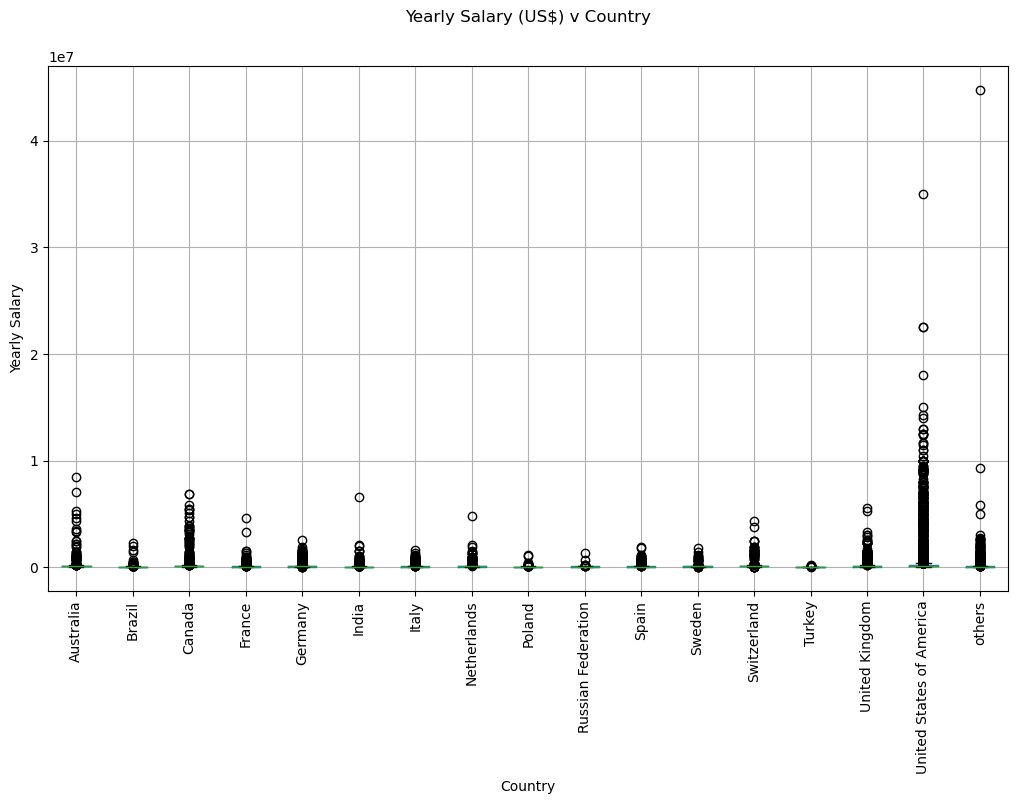

In [180]:
# fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('YearlySalary', 'Country', figsize=(12,7))
plt.suptitle('Yearly Salary (US$) v Country')
plt.title('')
plt.ylabel('Yearly Salary')
plt.xticks(rotation=90)
plt.show()

In [181]:
df = df[df["YearlySalary"] <= 140000]
df = df[df["YearlySalary"] >= 10000]
df = df[df['Country'] != 'others']

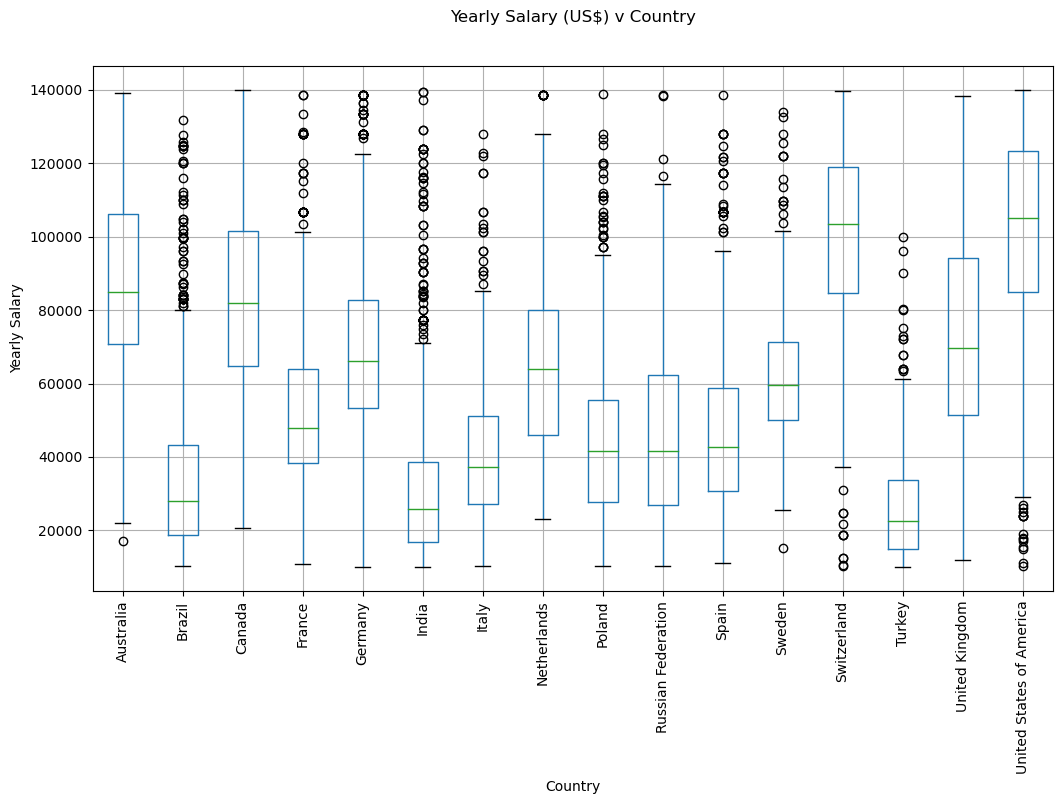

In [182]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('YearlySalary', 'Country', ax=ax)
plt.suptitle('Yearly Salary (US$) v Country')
plt.title('')
plt.ylabel('Yearly Salary')
plt.xticks(rotation=90)
plt.show()

In [183]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '8',
       '10', '7', '19', '12', '1', '11', 'Less than 1 year', '18', '37',
       '46', '23', '24', '22', '27', '13', '28', '16', '34', '35', '17',
       '38', '26', '30', '36', '32', '29', '33', '31', '42', '40', '39',
       '48', '45', '44', '43', '41', 'More than 50 years', '47', '49',
       '50'], dtype=object)

In [184]:
df

,Country,EdLevel,YearsCodePro,RemoteWork,YearsCode,Age,WorkExp,MainBranch,DevType,YearlySalary
2,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Hybrid (some remote, some in-person)",14,25-34 years old,0.0,"I am not primarily a developer, but I write co...",Data scientist or machine learning specialist;...,40205.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Hybrid (some remote, some in-person)",6,25-34 years old,6.0,I am a developer by profession,"Developer, back-end",49056.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Hybrid (some remote, some in-person)",5,18-24 years old,0.0,I am a developer by profession,"Developer, full-stack;Developer, back-end",60307.0
12,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Hybrid (some remote, some in-person)",12,25-34 years old,5.0,I am a developer by profession,"Developer, full-stack",65000.0
21,Italy,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,"Hybrid (some remote, some in-person)",5,25-34 years old,4.0,I am a developer by profession,"Developer, full-stack",34126.0
...,...,...,...,...,...,...,...,...,...,...
73111,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Hybrid (some remote, some in-person)",9,25-34 years old,0.0,I am a developer by profession,"Developer, back-end;Developer, QA or test;DevO...",115000.0
73113,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Fully remote,7,25-34 years old,7.0,I am a developer by profession,"Developer, desktop or enterprise applications;...",94000.0
73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,"Hybrid (some remote, some in-person)",21,35-44 years old,16.0,I am a developer by profession,"Developer, front-end;Developer, full-stack;Dev...",115000.0
73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Hybrid (some remote, some in-person)",5,25-34 years old,9.0,I am a developer by profession,"Developer, full-stack;Data or business analyst",70000.0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 2 to 73121
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       16435 non-null  object 
 1   EdLevel       16435 non-null  object 
 2   YearsCodePro  16435 non-null  object 
 3   RemoteWork    16435 non-null  object 
 4   YearsCode     16435 non-null  object 
 5   Age           16435 non-null  object 
 6   WorkExp       16435 non-null  float64
 7   MainBranch    16435 non-null  object 
 8   DevType       16435 non-null  object 
 9   YearlySalary  16435 non-null  float64
dtypes: float64(2), object(8)
memory usage: 1.4+ MB


In [186]:
categorical_columns = ["Country","EdLevel","RemoteWork","Age","MainBranch","DevType"]

for col in categorical_columns:
    print(f'__{col}__: {df[col].unique()}',end=" -- ")
    print(len(df[col].unique()),'\n')

__Country__: ['United Kingdom' 'Netherlands' 'United States of America' 'Italy'
 'Canada' 'Germany' 'Poland' 'France' 'Brazil' 'Sweden' 'Spain' 'Turkey'
 'India' 'Australia' 'Switzerland' 'Russian Federation'] -- 16 

__EdLevel__: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)' 'Something else'
 'Associate degree (A.A., A.S., etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D., Ed.D., etc.)' 'Primary/elementary school'] -- 9 

__RemoteWork__: ['Hybrid (some remote, some in-person)' 'Fully remote' 'Full in-person'] -- 3 

__Age__: ['25-34 years old' '18-24 years old' '35-44 years old' '55-64 years old'
 '45-54 years old' '65 years or older' 'Under 18 years old'] -- 7 

__MainBranch__: ['I am not primarily a developer, but I write code sometimes as part of my work'
 'I am 

In [187]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 51
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

def clean_mainBranch(x):
    if x == 'I am not primarily a developer, but I write code sometimes as part of my work':
        return 'Not professional developer'
    if x == 'I am a developer by profession':
        return 'Professional developer'
    return str(x)

def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral degree' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

profession = ["Data scientist",
"Front-end",
"Back-end",
"Full-Stack",
"Mobile",
"Game"]
def clean_devType(x):
    for p in profession:
        if p.lower() in x.lower():
            return p
    return str(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df['YearsCode'] = df['YearsCode'].apply(clean_experience)
df['MainBranch'] = df['MainBranch'].apply(clean_mainBranch)
df['DevType'] = df['DevType'].apply(clean_devType)
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [188]:
dev_map = shorten_categories(df.DevType.value_counts(), 150)
df['DevType'] = df['DevType'].map(dev_map)
df.DevType.value_counts()

Back-end                                         4619
Front-end                                        3908
Full-Stack                                       3878
others                                           2114
Data scientist                                    889
Mobile                                            493
Developer, desktop or enterprise applications     272
Developer, embedded applications or devices       262
Name: DevType, dtype: int64

In [189]:
# df = df[df['DevType'] != 'others']

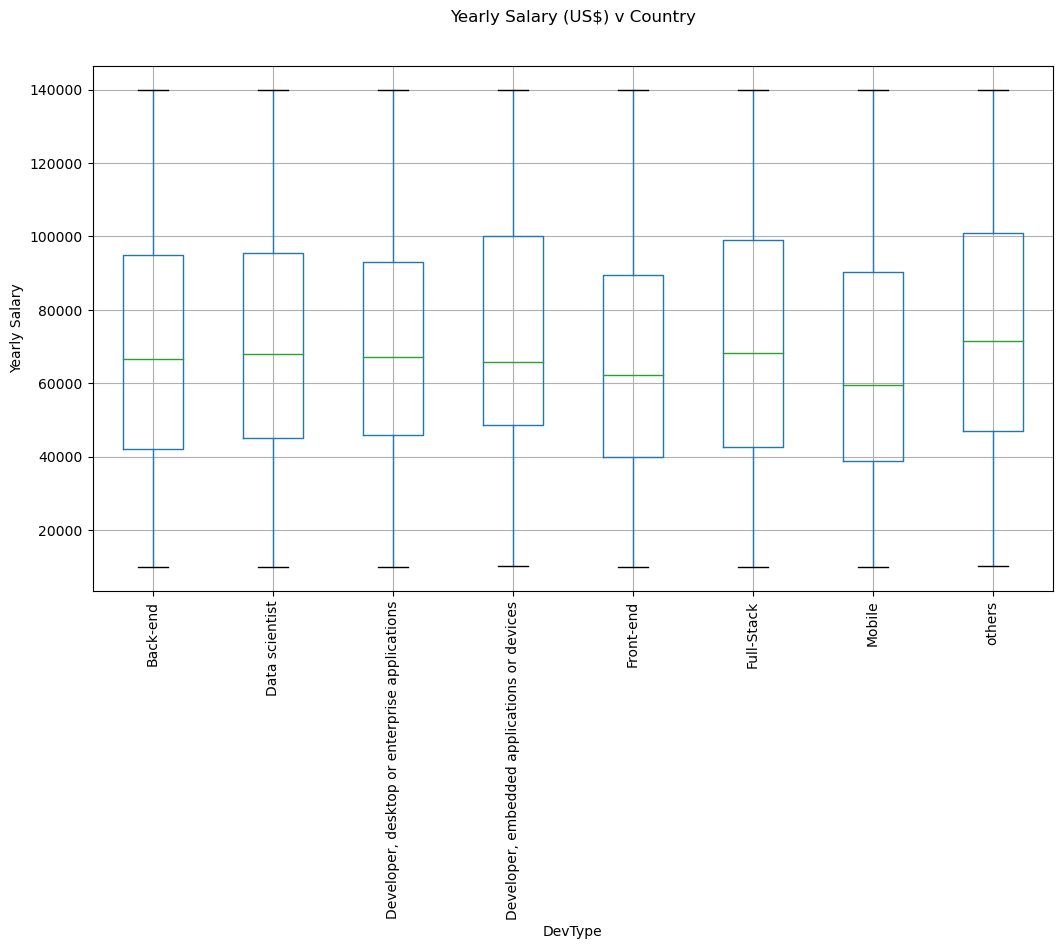

In [190]:
df.boxplot('YearlySalary', 'DevType', figsize=(12,7))
plt.suptitle('Yearly Salary (US$) v Country')
plt.title('')
plt.ylabel('Yearly Salary')
plt.xticks(rotation=90)
plt.show()

In [191]:
len(df.DevType.unique())

8

In [192]:
for col in categorical_columns:
    print(f'__{col}__: {df[col].unique()}',end=" -- ")
    print(len(df[col].unique()),'\n')

__Country__: ['United Kingdom' 'Netherlands' 'United States of America' 'Italy'
 'Canada' 'Germany' 'Poland' 'France' 'Brazil' 'Sweden' 'Spain' 'Turkey'
 'India' 'Australia' 'Switzerland' 'Russian Federation'] -- 16 

__EdLevel__: ['Master’s degree' 'Bachelor’s degree' 'Less than a Bachelors' 'Post grad'] -- 4 

__RemoteWork__: ['Hybrid (some remote, some in-person)' 'Fully remote' 'Full in-person'] -- 3 

__Age__: ['25-34 years old' '18-24 years old' '35-44 years old' '55-64 years old'
 '45-54 years old' '65 years or older' 'Under 18 years old'] -- 7 

__MainBranch__: ['Not professional developer' 'Professional developer'] -- 2 

__DevType__: ['Data scientist' 'Back-end' 'Full-Stack' 'others' 'Front-end'
 'Developer, desktop or enterprise applications'
 'Developer, embedded applications or devices' 'Mobile'] -- 8 



In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16435 entries, 2 to 73121
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       16435 non-null  object 
 1   EdLevel       16435 non-null  object 
 2   YearsCodePro  16435 non-null  float64
 3   RemoteWork    16435 non-null  object 
 4   YearsCode     16435 non-null  float64
 5   Age           16435 non-null  object 
 6   WorkExp       16435 non-null  float64
 7   MainBranch    16435 non-null  object 
 8   DevType       16435 non-null  object 
 9   YearlySalary  16435 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.4+ MB


In [194]:
from sklearn.preprocessing import LabelEncoder

data_dict = {}

for col in categorical_columns:
    data_dict['le_'+col] = LabelEncoder()
    df[col] = data_dict['le_'+col].fit_transform(df[col])
    display(df[col].unique())

array([14,  7, 15,  6,  2,  4,  8,  3,  1, 11, 10, 13,  5,  0, 12,  9])

array([2, 0, 1, 3])

array([2, 1, 0])

array([1, 0, 2, 4, 3, 5, 6])

array([0, 1])

array([1, 0, 5, 7, 4, 2, 3, 6])

In [195]:
print(data_dict.keys())

dict_keys(['le_Country', 'le_EdLevel', 'le_RemoteWork', 'le_Age', 'le_MainBranch', 'le_DevType'])


In [196]:
# le_country = LabelEncoder()
# df['Country'] = le_country.fit_transform(df['Country'])
# df["Country"].unique()

In [197]:
# Dividing Data
X = df.drop("YearlySalary", axis=1)
Y = df["YearlySalary"]

df = df.rename({"MainBranch":"Developer status"}, axis=1)
display(X, Y)

,Country,EdLevel,YearsCodePro,RemoteWork,YearsCode,Age,WorkExp,MainBranch,DevType
2,14,2,5.0,2,14.0,1,0.0,0,1
8,7,2,6.0,2,6.0,1,6.0,1,0
10,14,0,2.0,2,5.0,0,0.0,1,0
12,15,0,5.0,2,12.0,1,5.0,1,5
21,6,2,4.0,2,5.0,1,4.0,1,5
...,...,...,...,...,...,...,...,...,...
73111,15,0,5.0,2,9.0,1,0.0,1,0
73113,15,2,5.0,1,7.0,1,7.0,1,7
73116,15,0,16.0,2,21.0,2,16.0,1,4
73119,15,0,1.0,2,5.0,1,9.0,1,5


2         40205.0
8         49056.0
10        60307.0
12        65000.0
21        34126.0
           ...   
73111    115000.0
73113     94000.0
73116    115000.0
73119     70000.0
73121     75384.0
Name: YearlySalary, Length: 16435, dtype: float64

In [198]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, Y.values)
DecisionTreeRegressor(random_state=0)
Y_pred = dec_tree_reg.predict(X)
error = np.sqrt(mean_squared_error(Y, Y_pred))
print("${:,.02f}".format(error))

$4,756.53


In [199]:
# Input: Country(str), EdLevel(str), YearsCodePro(int), RemoteWork(str), 
#        YearsCode(int), Age(str->int), WorkExp(int), MainBranch>Developer status(str), DevType(str)

# Age: ['25-34 years old', '18-24 years old', '35-44 years old', '55-64 years old', 
# '45-54 years old', '65 years or older', 'Under 18 years old']

In [200]:
# country, edlevel, yearscode USER_INPUT
'''
X = np.array([["United States", 'Master’s degree', 15 ]])
X
array([['United States', 'Master’s degree', '15']], dtype='
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X
array([[13.,  2., 15.]])
y_pred = regressor.predict(X)
y_pred
array([139427.26315789])
'''

'\nX = np.array([["United States", \'Master’s degree\', 15 ]])\nX\narray([[\'United States\', \'Master’s degree\', \'15\']], dtype=\'\nX[:, 0] = le_country.transform(X[:,0])\nX[:, 1] = le_education.transform(X[:,1])\nX = X.astype(float)\nX\narray([[13.,  2., 15.]])\ny_pred = regressor.predict(X)\ny_pred\narray([139427.26315789])\n'

## Storing Trained Model

In [201]:
import pickle

In [202]:
data_dict["model"] = dec_tree_reg
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data_dict, file)
    
with open('saved_model.pkl', 'rb') as file:
    data = pickle.load(file)

In [203]:
regressor_loaded = data_dict["model"]
le_Country = data["le_Country"]
le_EdLevel = data['le_EdLevel']
le_RemoteWork = data['le_RemoteWork']
le_Age = data['le_Age'] 
le_MainBranch = data['le_MainBranch']
le_DevType = data['le_DevType']

In [204]:
y_pred = regressor_loaded.predict(X)
print(y_pred)

[ 40205.   49056.   51512.  ... 115000.   70000.   91088.5]


In [205]:
print(Y)

2         40205.0
8         49056.0
10        60307.0
12        65000.0
21        34126.0
           ...   
73111    115000.0
73113     94000.0
73116    115000.0
73119     70000.0
73121     75384.0
Name: YearlySalary, Length: 16435, dtype: float64


In [206]:
error = np.sqrt(mean_squared_error(Y, y_pred))
print("${:,.02f}".format(error))

$4,756.53


In [207]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


bridge_types = ['25-34 years old', '18-24 years old', '35-44 years old', '55-64 years old', 
'45-54 years old', '65 years or older', 'Under 18 years old']
bridge_df = pd.DataFrame(bridge_types, columns=['Bridge_Types'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
bridge_df['Bridge_Types_Cat'] = labelencoder.fit_transform(bridge_df['Bridge_Types'])
bridge_df

,Bridge_Types,Bridge_Types_Cat
0,25-34 years old,1
1,18-24 years old,0
2,35-44 years old,2
3,55-64 years old,4
4,45-54 years old,3
5,65 years or older,5
6,Under 18 years old,6
